In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv(r"C:\Users\penfr\OneDrive\Desktop\Intellipaat_Python\capstone_walmart\Walmart DataSet.csv")

In [24]:
#Performing EDA
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# There are 6435 records and only DATE column is of object type

In [6]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# There are no null values

In [7]:
df.duplicated().sum()

0

# There are no duplicated rows

In [8]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Outlier analysis

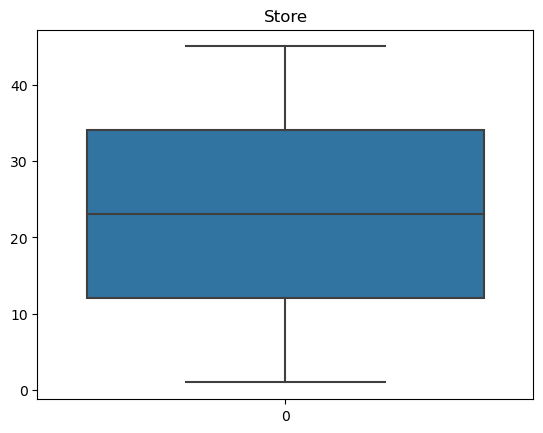

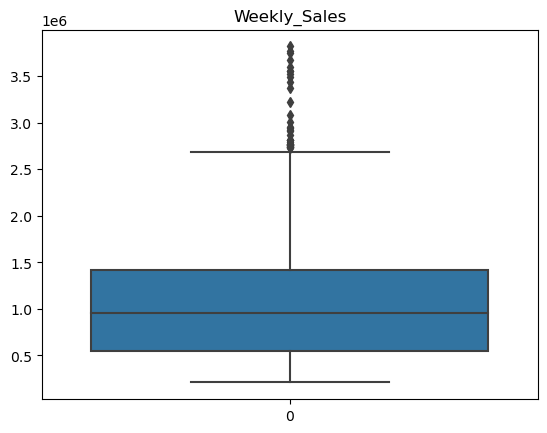

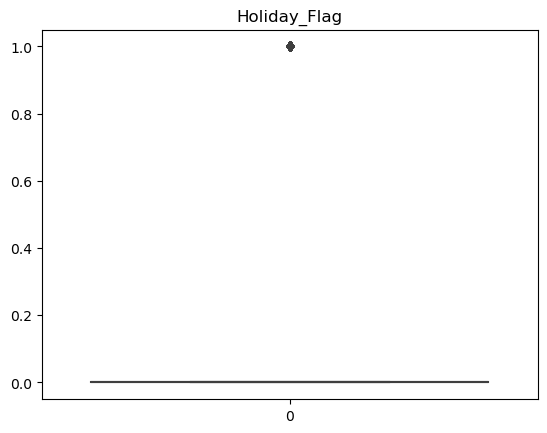

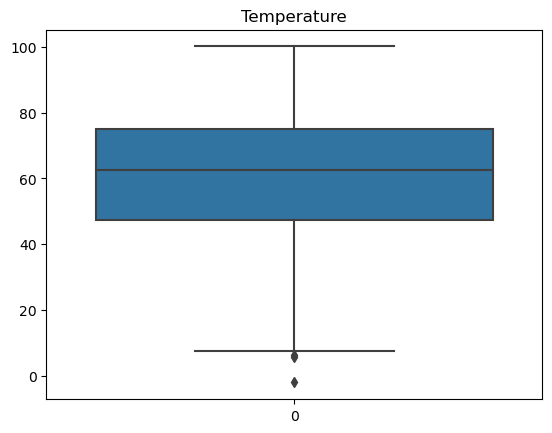

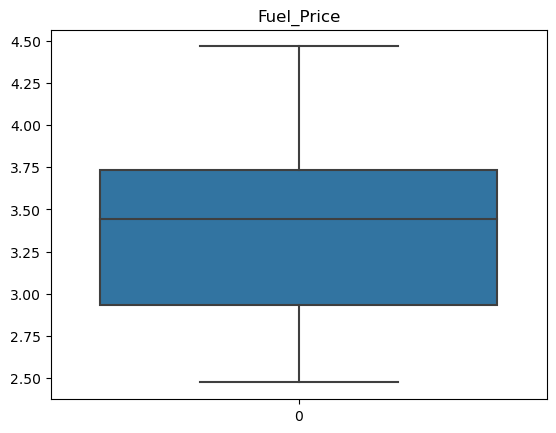

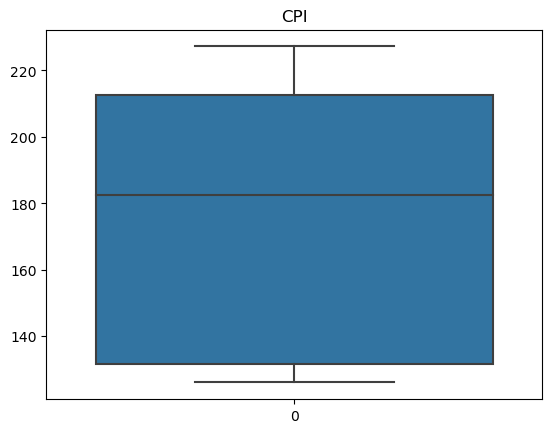

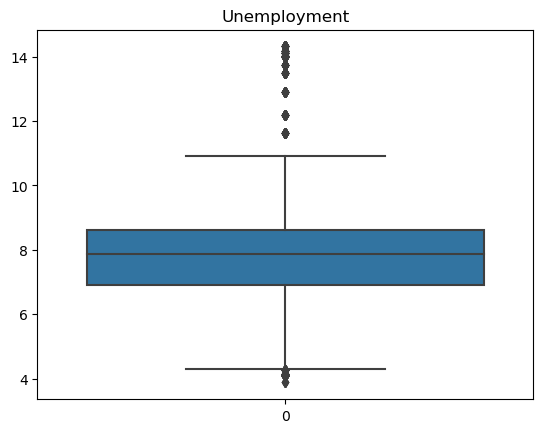

In [9]:
for col in df.columns:
    if df[col].dtype!=object:
        sns.boxplot(data=df[col])
        plt.title(col)
        plt.show()

# Here it is seen that columns:Weekly sales and Unemployment have outliers

In [10]:
print(df.columns)
data=['Weekly_Sales','Unemployment']

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


# Handling outliers

In [11]:
def handle_outliers(df,col,threshold=3):
    #Calculate Z-scores for the specified column
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    '''In many statistical analyses, a Z-score threshold of 3 is commonly used to identify outliers. 
    This is based on the empirical rule, which states that approximately 99.7% of the data falls within three 
    standard deviations of the mean in a normal distribution. 
    Data points with Z-scores greater than 3 are considered to be outliers.'''
    # Identify outliers using the threshold
    outliers = df[z_scores > threshold]
    # Replace outliers with the median value
    median = df[col].median()
    df_cleaned = df.copy()  # Create a copy 
    df_cleaned.loc[z_scores > threshold, col] = median
    
    return df_cleaned

df_cleaned = handle_outliers(df, 'Weekly_Sales')
df_cleaned = handle_outliers(df,'Unemployment')

# Correlation Analysis

In [12]:
df_corr=df_cleaned.corr(numeric_only=True)
print(df_corr)

                     Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.486480e-01     -0.096145  1.399390e-02     0.075733   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.248648  
Weekly_Sales    0.009464 -0.072634     -0.096145  
Holiday_Flag   -0.078347 -0.002162      0.013994  
Temperature     0.144982  0.176888      0.075733  
Fuel_Price      1.000000 -0.170642     -0.024987  
CPI            -0.170642  1.000000     -0.220248  
Unemployment   -0.024987 -0.220248      1.000000  


<AxesSubplot:>

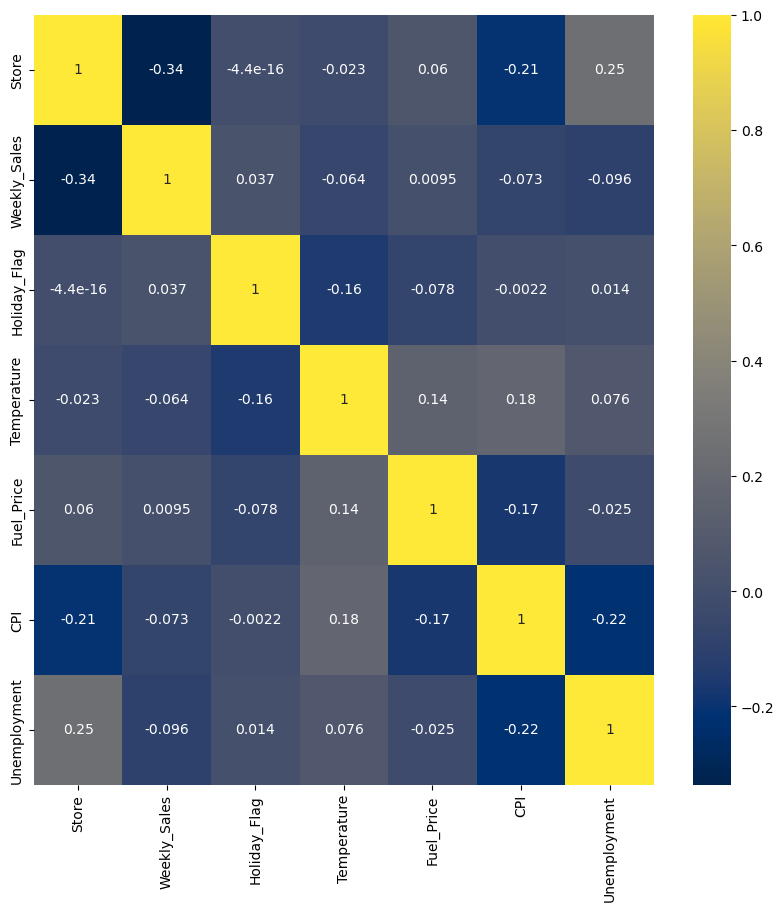

In [13]:
#Plotting heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,cmap='cividis')

In [14]:
#Setting threshold to check the dependency
corr_map = df_cleaned.corrwith(df_cleaned['Unemployment'])
dependent_variables = corr_map[corr_map < 0.55].index.tolist()

# Display the selected dependent variables
print("Selected dependent variables based on correlation threshold:")
print(dependent_variables)

Selected dependent variables based on correlation threshold:
['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI']


C:\Users\penfr\AppData\Local\Temp\ipykernel_13920\3467901017.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_map = df_cleaned.corrwith(df_cleaned['Unemployment'])


    Store       level_1  Unemployment
0       1  Weekly_Sales     -0.097955
1       2  Weekly_Sales      0.066325
2       3  Weekly_Sales     -0.230413
3       4  Weekly_Sales     -0.337015
4       5  Weekly_Sales     -0.207043
5       6  Weekly_Sales      0.044251
6       7  Weekly_Sales     -0.165382
7       8  Weekly_Sales     -0.052580
8       9  Weekly_Sales     -0.191534
9      10  Weekly_Sales      0.131908
10     11  Weekly_Sales     -0.020339
11     12  Weekly_Sales      0.087686
12     13  Weekly_Sales     -0.171633
13     14  Weekly_Sales      0.210786
14     15  Weekly_Sales      0.078905
15     16  Weekly_Sales     -0.070864
16     17  Weekly_Sales     -0.263600
17     18  Weekly_Sales      0.139179
18     19  Weekly_Sales      0.101464
19     20  Weekly_Sales     -0.095341
20     21  Weekly_Sales      0.218367
21     22  Weekly_Sales      0.039043
22     23  Weekly_Sales     -0.077169
23     24  Weekly_Sales     -0.012261
24     25  Weekly_Sales     -0.004958
25     26  W

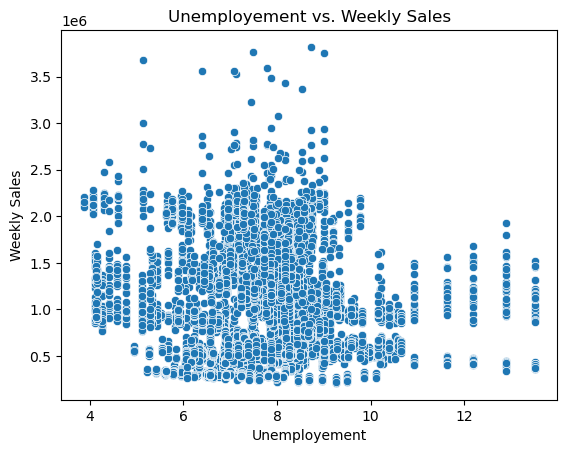

In [15]:
# Calculate correlation between Weekly_Sales and Unemployment for each store
corr_unemp = df_cleaned.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2,-1].reset_index()
print(corr_unemp)
sns.scatterplot(data=df_cleaned, x='Unemployment', y='Weekly_Sales')
plt.title('Unemployement vs. Weekly Sales')
plt.xlabel('Unemployement')
plt.ylabel('Weekly Sales')
plt.show()

In [16]:
#Printing store IDs affected by Unemployment
cr=corr_unemp[corr_unemp['Unemployment'].abs() > 0.5]
print("Store IDs affected:\n",cr['Store'].to_string(index=False))

Store IDs affected:
 36
38
44


C:\Users\penfr\AppData\Local\Temp\ipykernel_13920\3461884352.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_cleaned['Date']=pd.to_datetime(df['Date'])
C:\Users\penfr\AppData\Local\Temp\ipykernel_13920\3461884352.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_cleaned, x='Month', y='Weekly_Sales', hue='Year', ci=None)


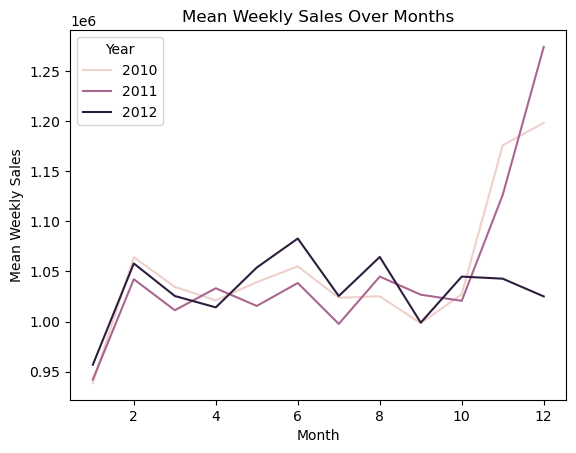

In [17]:
df_cleaned['Date']=pd.to_datetime(df['Date'])
df_cleaned['Month']=df_cleaned['Date'].dt.month
df_cleaned['Year']=df_cleaned['Date'].dt.year
sns.lineplot(data=df_cleaned, x='Month', y='Weekly_Sales', hue='Year', ci=None)
plt.title('Mean Weekly Sales Over Months')
plt.xlabel('Month')
plt.ylabel('Mean Weekly Sales')
plt.show()

# We observe a spike in weekly sales during the month of December in both 2010 and 2011, but not in 2012,it maybe due to Holiday Shopping Season

In [18]:
# Filter DataFrame for December 2010 and 2011
dec_2010_2011 = df_cleaned[(df_cleaned['Year'].isin([2010, 2011])) & (df_cleaned['Month'] == 12)]

# Check if Holiday_Flag is True during December 2010 and 2011
holiday_flag = dec_2010_2011['Holiday_Flag'].any()

print("Is Holiday_Flag True during December 2010 and 2011 spike in weekly sales:", holiday_flag)

Is Holiday_Flag True during December 2010 and 2011 spike in weekly sales: True


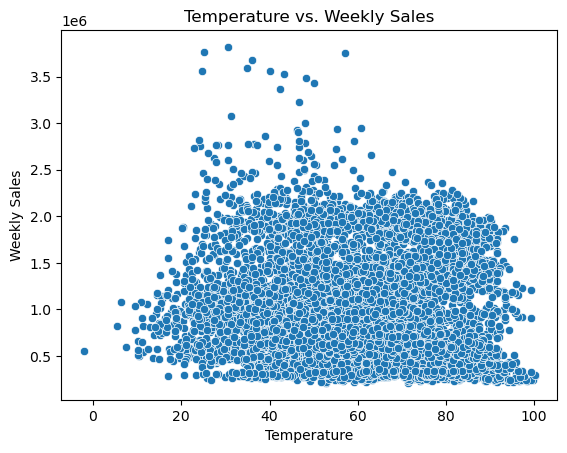

In [19]:
#scatter plot of temperature vs weekly sales to check effect of temperature
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

C:\Users\penfr\AppData\Local\Temp\ipykernel_13920\3965427174.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_cleaned, x='Temperature', y='Weekly_Sales', ci=None)


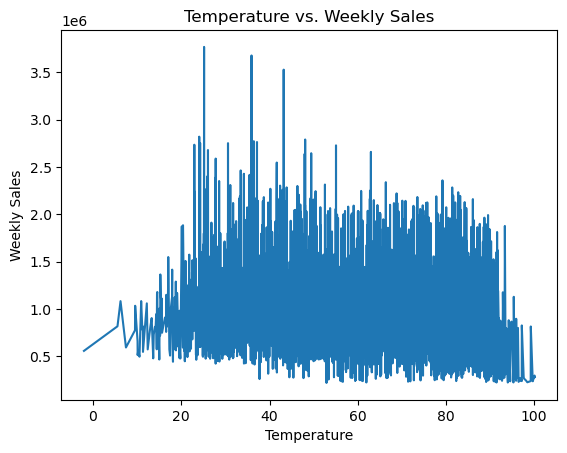

In [20]:
# Create line plot with smoothed trend line
sns.lineplot(data=df_cleaned, x='Temperature', y='Weekly_Sales', ci=None)
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

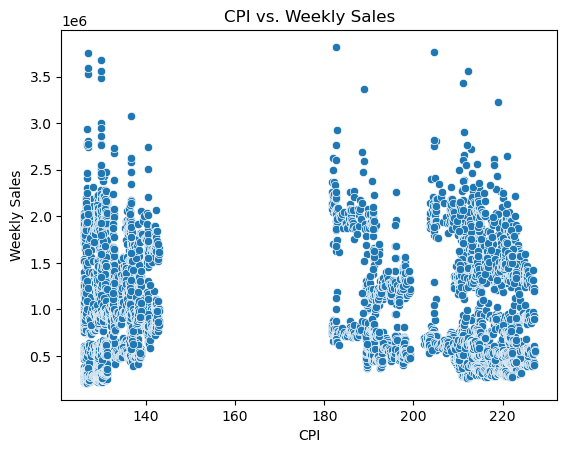

In [21]:
# Effect of CPI on weekly sales
# Calculate correlation between Weekly_Sales and CPI for each store
correlation_cpi = df_cleaned.groupby('Store')[['Weekly_Sales', 'CPI']].corr().iloc[0::2,-1].reset_index()
# Plot scatter plot of CPI vs weekly sales
sns.scatterplot(data=df_cleaned, x='CPI', y='Weekly_Sales')
plt.title('CPI vs. Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()


In [22]:
#Top performing stores
top_stores = df_cleaned.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head()

#Worst performing store and performance difference
worst_store = df_cleaned.groupby('Store')['Weekly_Sales'].sum().idxmin()
performance_difference = df_cleaned.groupby('Store')['Weekly_Sales'].sum().max() - df_cleaned.groupby('Store')['Weekly_Sales'].sum().min()

print("Top performing stores:", top_stores)
print("Worst performing store:", worst_store)
print("Difference between highest and lowest performing stores:", performance_difference)

Top performing stores: Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64
Worst performing store: 33
Difference between highest and lowest performing stores: 264237570.49999997


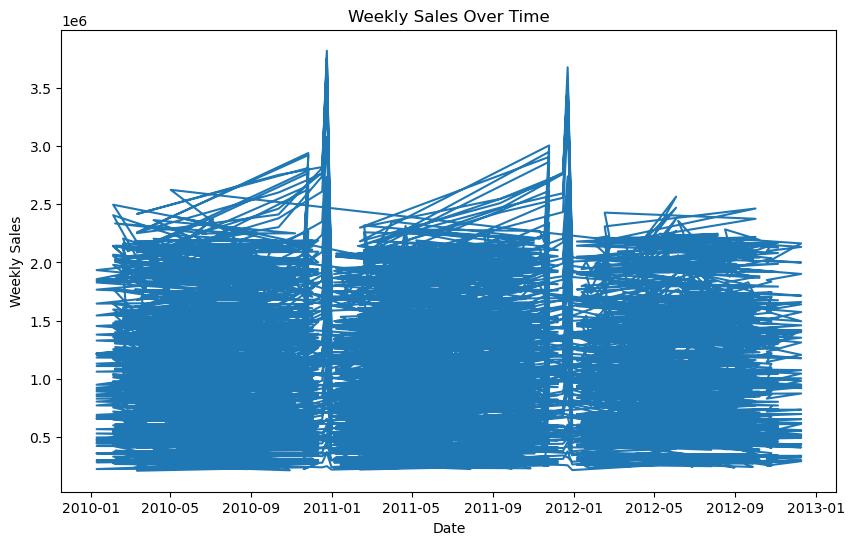

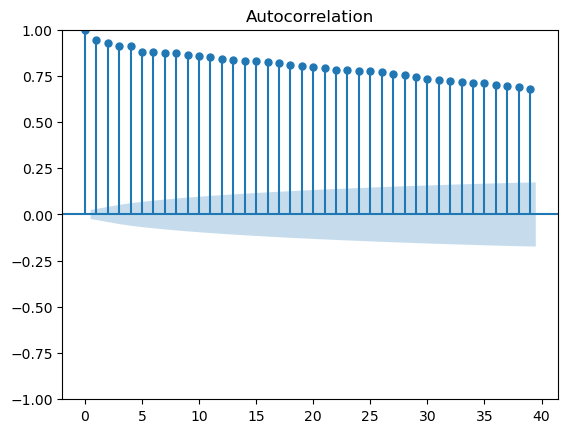

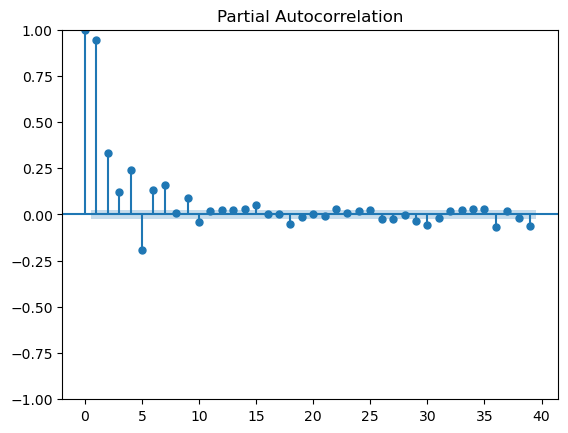

C:\Users\penfr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\penfr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\penfr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\penfr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\penfr\anaconda3\lib\site-

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                 6435
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -86651.061
Date:                Sat, 10 Feb 2024   AIC                         173308.121
Time:                        19:09:39   BIC                         173328.429
Sample:                             0   HQIC                        173315.149
                               - 6435                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2386      0.014     16.705      0.000       0.211       0.267
ma.L1         -0.6679      0.011    -58.951      0.000      -0.690      -0.646
sigma2      2.921e+10   4.07e-14   7.17e+23      0.0

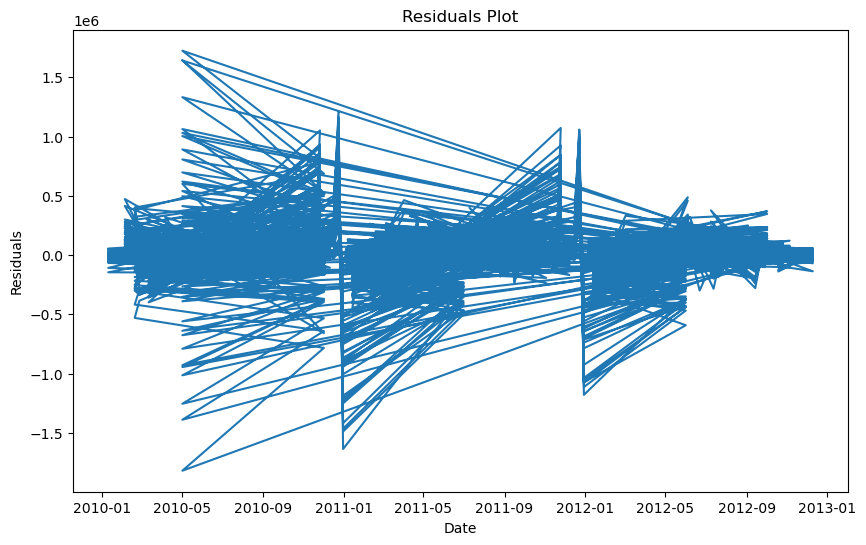

Forecasted values: 6435    745281.277171
6436    741701.583684
6437    740847.312023
6438    740643.445387
6439    740594.793878
6440    740583.183497
6441    740580.412751
6442    740579.751530
6443    740579.593734
6444    740579.556077
6445    740579.547090
6446    740579.544946
Name: predicted_mean, dtype: float64


C:\Users\penfr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\penfr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Converting 'Date' column in datetime format and set as index
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned.set_index('Date', inplace=True)

#Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

#Checking autocorrelation and partial autocorrelation plots
plot_acf(df_cleaned['Weekly_Sales'])
plot_pacf(df_cleaned['Weekly_Sales'])
plt.show()

#Fit ARIMA model
model = ARIMA(df_cleaned['Weekly_Sales'], order=(1, 1, 1))  
results = model.fit()


print(results.summary())

#Plotting the residuals
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

#Making forecasts
forecast = results.forecast(steps=12)  
print("Forecasted values:", forecast)


# 